In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-06 18:27:03--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.1s    

2025-10-06 18:27:03 (5.84 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [5]:
df = pd.read_csv("car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


Text(0, 0.5, 'Frequency')

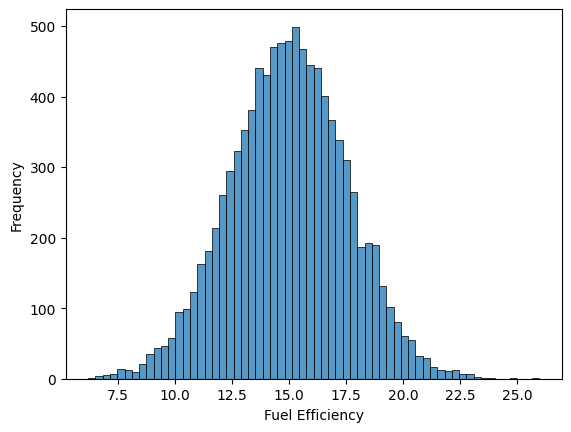

In [35]:
sns.histplot(df["fuel_efficiency_mpg"])
plt.xlabel("Fuel Efficiency")
plt.ylabel("Frequency")

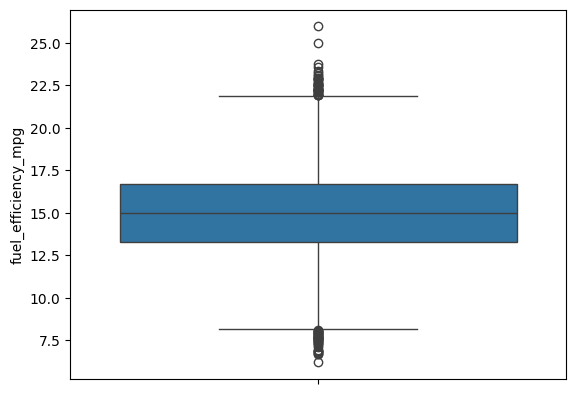

In [14]:
# check for outliers
sns.boxplot(df["fuel_efficiency_mpg"]);

In [16]:
# check for missing values
df.isnull().sum()

,0
engine_displacement,0
num_cylinders,482
horsepower,708
vehicle_weight,0
acceleration,930
model_year,0
origin,0
fuel_type,0
drivetrain,0
num_doors,502


In [17]:
df["horsepower"].head()

,horsepower
0,159.0
1,97.0
2,78.0
3,NaN
4,140.0


In [18]:
# median of horsepower column
df["horsepower"].median()

149.0

In [21]:
# filter for the cols we'll only be using
"""
'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'
"""
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [23]:
cols_to_keep=['engine_displacement',
              'horsepower',
              'vehicle_weight',
              'model_year',
              'fuel_efficiency_mpg']

df2 = df[cols_to_keep]
df2.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [25]:
shuffled_df = df2.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [44]:
shuffled_df.shape

(9704, 5)

In [45]:
# col with missing vals
shuffled_df.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [100]:
X = shuffled_df.drop(columns='fuel_efficiency_mpg')
y = shuffled_df["fuel_efficiency_mpg"]
print(f"Shape of X: {X.shape}\nShape of y: {y.shape}")

Shape of X: (9704, 4)
Shape of y: (9704,)


In [101]:
shuffled_df.dtypes

,0
engine_displacement,int64
horsepower,float64
vehicle_weight,float64
model_year,int64
fuel_efficiency_mpg,float64


In [102]:
X.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0


In [94]:
# fill the missing vals in horsepower with 0 then mean of horsepower col from training data
"""

X["horsepower"] = X["horsepower"].fillna()
X.isnull().sum()
"""

'\n\nX["horsepower"] = X["horsepower"].fillna()\nX.isnull().sum()\n'

In [104]:
# train, val, test split
np.random.seed(42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [105]:
print(X_train.shape)
print(y_train.shape)

(5822, 4)
(5822,)


In [106]:
print(X_test.shape)
print(y_test.shape)

(1941, 4)
(1941,)


In [107]:
print(y_val.shape)

(1941,)


In [108]:
X_train.isnull().sum()

,0
engine_displacement,0
horsepower,420
vehicle_weight,0
model_year,0


In [110]:
# impute with the mean of X_train
mean_val = X_train["horsepower"].mean()
X_train["horsepower"] = X_train["horsepower"].fillna(mean_val)
X_val["horsepower"] = X_val["horsepower"].fillna(mean_val)

In [113]:
X_train.isnull().sum() == X_val.isnull().sum()

,0
engine_displacement,True
horsepower,True
vehicle_weight,True
model_year,True


### Linear model from scratch

In [48]:
x1 = [1, 148, 200, 333]
x2 = [1, 132, 201, 333]
x10 = [1, 2, 222, 333]

w = [0.01, 0.04, 0.002, 0.1]

X = [x1, x2, x10]
X = np.array(X)
X

array([[  1, 148, 200, 333],
       [  1, 132, 201, 333],
       [  1,   2, 222, 333]])

In [50]:
def linear_reg(X):
  return X.dot(w)

In [51]:
linear_reg(X)

array([39.63 , 38.992, 33.834])

In [114]:
# Use the sklearn linear reg
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)

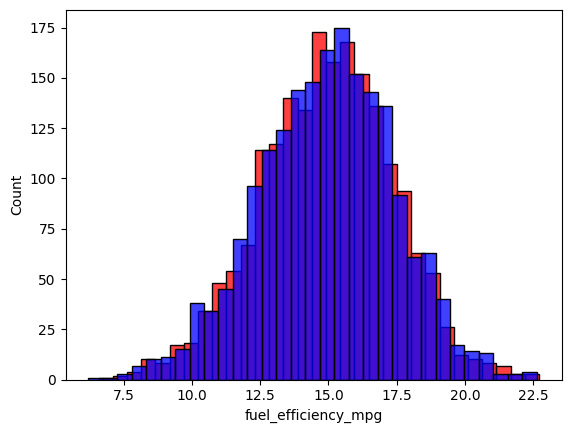

In [115]:
# plot the predictions
sns.histplot(y_pred_val, color='red')
sns.histplot(y_val, color='blue');

In [116]:
y_val.shape == y_pred_val.shape

True

In [155]:
# Calculates the root mean of squared error
def rmse(y_true, y_pred):
  squared_error = (y_true - y_pred) ** 2
  mean_se = squared_error.mean()
  r_mse = np.sqrt(mean_se)
  return round(float(r_mse), 2)

In [153]:
# from imputing NaN values with 0 we get RMSE
rmse(y_val, y_pred_val)

np.float64(0.4585064814908114)

In [118]:
# from imputing NaN values with the mean
rmse(y_val, y_pred_val)

0.46

## Q4. Regularisation

In [119]:
shuffled_df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [135]:
X2 = shuffled_df.drop(columns='fuel_efficiency_mpg')
y2 = shuffled_df["fuel_efficiency_mpg"]
print(f"Shape of X: {X.shape}\nShape of y: {y.shape}")

Shape of X: (9704, 4)
Shape of y: (9704,)


In [136]:
# fill with 0 as asked in the question
X2["horsepower"].fillna(0, inplace=True);

/tmp/ipython-input-3329028345.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X2["horsepower"].fillna(0, inplace=True);


In [137]:
X2.isnull().sum()

,0
engine_displacement,0
horsepower,0
vehicle_weight,0
model_year,0


In [139]:
# train, val, test split
np.random.seed(42)
X_train, X_temp, y_train, y_temp = train_test_split(X2, y2, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [149]:
# for regularisation importing Ridge
from sklearn.linear_model import Ridge
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
hist = []

for r in r_values:
  model = Ridge(alpha=r)
  model.fit(X_train, y_train)
  y_preds = model.predict(X_val)
  error = rmse(y_val, y_preds)
  print(f"With r = {r}: RMSE: {error}")
  hist.append(error)



With r = 0: RMSE: 0.51
With r = 0.01: RMSE: 0.51
With r = 0.1: RMSE: 0.51
With r = 1: RMSE: 0.51
With r = 5: RMSE: 0.51
With r = 10: RMSE: 0.51
With r = 100: RMSE: 0.51


Clearly, no effect of regularisation

## Q5 Different seed values

In [170]:
# --- Load dataset
df2 = pd.read_csv("car_fuel_efficiency.csv").fillna(0)

# --- Features and target
X = df2[['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight']]
y = df2['fuel_efficiency_mpg']


# Calculates the root mean of squared error
def rmse(y_true, y_pred):
  squared_error = (y_true - y_pred) ** 2
  mean_se = squared_error.mean()
  r_mse = np.sqrt(mean_se)
  return float(r_mse)

# iterate with different random seeds
hist = []

for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  X_tr, X_temp, y_tr, y_temp = train_test_split(X, y, test_size=0.4, random_state=i)
  X_val, X_t, y_val, y_t = train_test_split(X_temp, y_temp, test_size=0.5, random_state=i)

  model = LinearRegression()
  model.fit(X_tr, y_tr)
  y_p = model.predict(X_val)
  r_mse = rmse(y_val, y_p)

  print(f"With seed {i}: RMSE: {r_mse}")

  hist.append(r_mse)


With seed 0: RMSE: 0.5179381763288806
With seed 1: RMSE: 0.5171639086555457
With seed 2: RMSE: 0.5198562964522706
With seed 3: RMSE: 0.5215830764201178
With seed 4: RMSE: 0.5113660125711117
With seed 5: RMSE: 0.5150801979905301
With seed 6: RMSE: 0.5145383165566438
With seed 7: RMSE: 0.5357713657145978
With seed 8: RMSE: 0.5183959791528321
With seed 9: RMSE: 0.5197067240692991


In [171]:
hist

[0.5179381763288806,
 0.5171639086555457,
 0.5198562964522706,
 0.5215830764201178,
 0.5113660125711117,
 0.5150801979905301,
 0.5145383165566438,
 0.5357713657145978,
 0.5183959791528321,
 0.5197067240692991]

In [172]:
# get the stddev of the RMSEs
ans = float(np.std(hist))
print(f"STD: {ans}")

STD: 0.006224150161088512


# Final modular functions after going through all the processes above

In [173]:
def load_data(file_path="car_fuel_efficiency.csv"):
    df = pd.read_csv(file_path)[[
        'engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg'
    ]]
    return df

In [174]:
def preprocess(df, fill_method="zero"):
    df = df.copy()
    if fill_method == "zero":
        df = df.fillna(0)
    elif fill_method == "mean":
        # Fill NA using training mean; done later in train function
        pass
    return df

In [185]:
# split into train, val, test sets
def split_data(X, y, val, seed=42):
  if val:
    X_tr, X_temp, y_tr, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed)
    X_val, X_t, y_val, y_t = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)
    return X_tr, X_val, X_t, y_tr, y_val, y_t

  else:
      X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.4, random_state=seed)
      return X_tr, X_t, y_tr, y_t



In [177]:
def rmse(y_true, y_pred):
  squared_error = (y_true - y_pred) ** 2
  mean_se = squared_error.mean()
  r_mse = np.sqrt(mean_se)
  return float(r_mse)

In [178]:
# Train Linear Regression
def train_linear(X_tr, y_tr):
    model = LinearRegression()
    model.fit(X_tr, y_tr)
    return model

# Train Ridge Regression with regularization r (alpha)
def train_ridge(X_tr, y_tr, r):
    model = Ridge(alpha=r)
    model.fit(X_tr, y_tr)
    return model

In [179]:
# Evaluate model on given dataset
def evaluate(model, X, y):
    y_pred = model.predict(X)
    return rmse(y, y_pred)

## Q6: Evaluating on test data

In [214]:
df_ = load_data("car_fuel_efficiency.csv")
df_.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [215]:
df_ = preprocess(df_)
df_.isnull().sum()

,0
engine_displacement,0
horsepower,0
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [216]:
df_.head()


,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,0.0,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [217]:
X = df_.drop(columns="fuel_efficiency_mpg")
y = df_["fuel_efficiency_mpg"]

In [218]:
X_train, X_test, y_train, y_test = split_data(X, y, False, seed=9)

In [219]:
model = train_ridge(X_tr=X_train, y_tr=y_train, r=0.001)
model

Ridge(alpha=0.001)

## Let's see the error on the test data

In [220]:
y_pred_test = model.predict(X_test)
rmse(y_test, y_pred_test)

0.520226928799458

## The error on the test set is still pretty reasonable compared to the training and validation sets. For now, looks good!